# Day-10: Decision Trees and Random Forest

In [ ]:
from google.colab import files
uploaded = files.upload()


Accuracy: 97.77777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



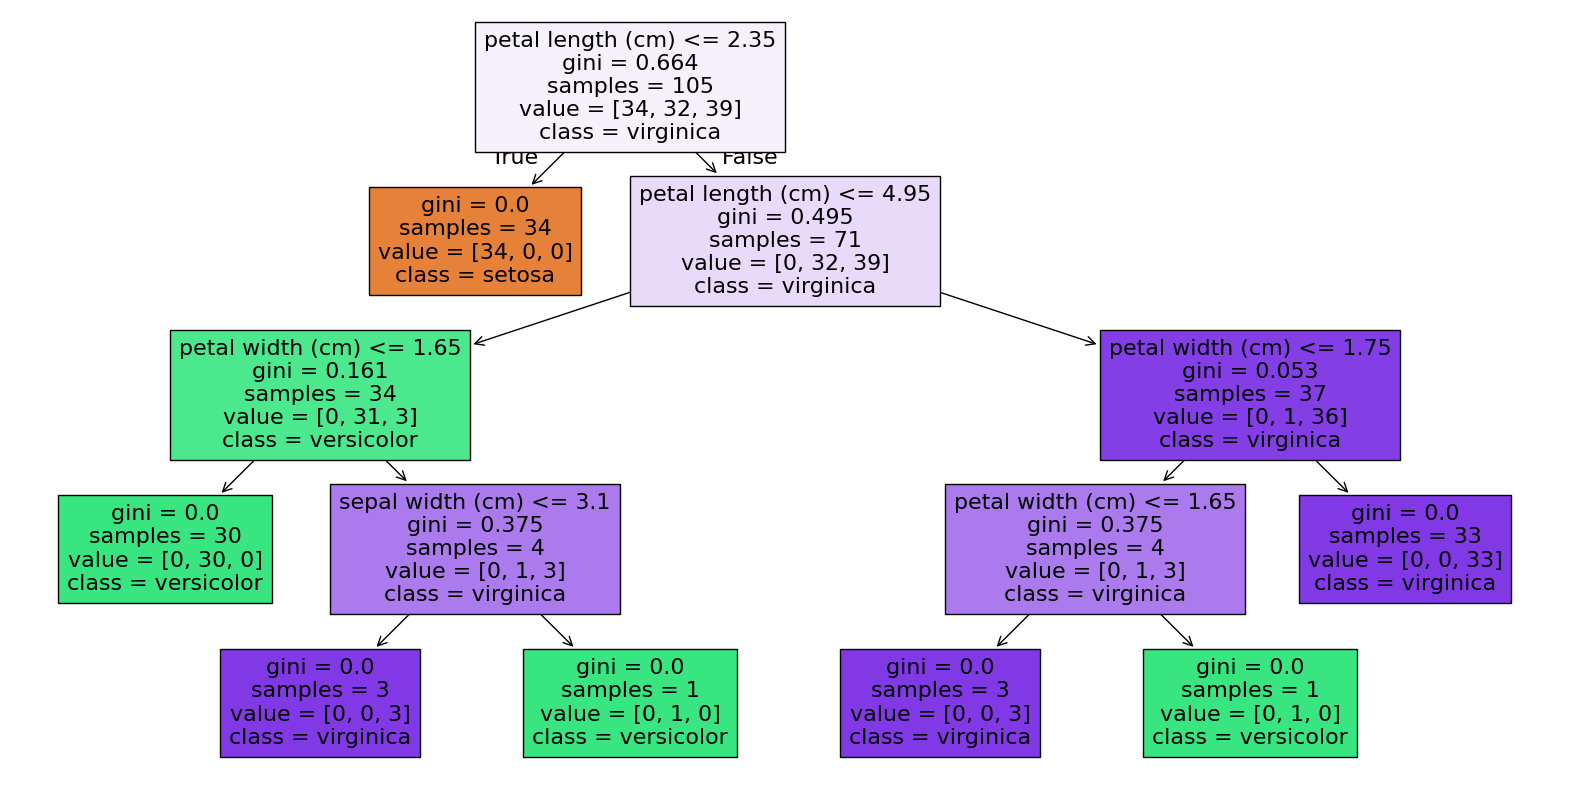

In [4]:
# 1. Decision Tree on Iris Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [9]:
# 2. Decision Tree on Social Network Ads dataset
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix



In [6]:
from google.colab import files
uploaded = files.upload()


Saving Social_Network_Ads.csv to Social_Network_Ads.csv


Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


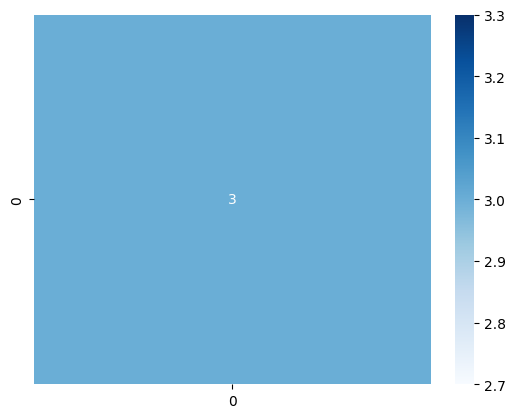

In [10]:
# Load dataset
df_net = pd.read_csv('Social_Network_Ads.csv')
df_net.drop(columns=['User ID'], inplace=True)
le = LabelEncoder()
df_net['Gender'] = le.fit_transform(df_net['Gender'])

X = df_net.iloc[:, :-1].values
y = df_net.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()


In [8]:
# 3. Random Forest on Iris.csv
iris_df = pd.read_csv('iris.csv')
X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, -1].values

from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1score = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy * 100)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1score)


Accuracy: 100.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
